In [1]:
import laspy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import zscore
import seaborn as sns

In [2]:
# Load a .laz file
file_path = "CASBC_0033_20240912_1.laz"
las = laspy.read(file_path)

dimensions = list(las.point_format.dimension_names)
print("Available Dimensions:", dimensions)
print("Point Format:", las.header.point_format)
print("Number of Points:", las.header.point_count)

Available Dimensions: ['X', 'Y', 'Z', 'intensity', 'return_number', 'number_of_returns', 'synthetic', 'key_point', 'withheld', 'overlap', 'scanner_channel', 'scan_direction_flag', 'edge_of_flight_line', 'classification', 'user_data', 'scan_angle', 'point_source_id', 'gps_time', 'red', 'green', 'blue']
Point Format: <PointFormat(7, 0 bytes of extra dims)>
Number of Points: 10562656


In [3]:
# Convert ScaledArrayView to NumPy arrays
x = np.array(las.x)
y = np.array(las.y)
z = np.array(las.z)

# Convert to DataFrame
df = pd.DataFrame({
    "X": x,
    "Y": y,
    "Z": z,
    "intensity": las.intensity,
    "return_number": las.return_number,
    "number_of_returns": las.number_of_returns,
    "synthetic": las.synthetic,
    "key_point": las.key_point,
    "withheld": las.withheld,
    "overlap": las.overlap,
    "scanner_channel": las.scanner_channel,
    "scan_direction_flag": las.scan_direction_flag,
    "edge_of_flight_line": las.edge_of_flight_line,
    "classification": las.classification,
    "user_data": las.user_data,
    "scan_angle": las.scan_angle,
    "point_source_id": las.point_source_id,
    "gps_time": las.gps_time,
    "red": las.red,
    "green": las.green,
    "blue": las.blue
})

# Basic information
print('Dataset Shape:', df.shape)
df.info()

Dataset Shape: (10562656, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10562656 entries, 0 to 10562655
Data columns (total 21 columns):
 #   Column               Dtype  
---  ------               -----  
 0   X                    float64
 1   Y                    float64
 2   Z                    float64
 3   intensity            uint16 
 4   return_number        object 
 5   number_of_returns    object 
 6   synthetic            object 
 7   key_point            object 
 8   withheld             object 
 9   overlap              object 
 10  scanner_channel      object 
 11  scan_direction_flag  object 
 12  edge_of_flight_line  object 
 13  classification       uint8  
 14  user_data            uint8  
 15  scan_angle           int16  
 16  point_source_id      uint16 
 17  gps_time             float64
 18  red                  uint16 
 19  green                uint16 
 20  blue                 uint16 
dtypes: float64(4), int16(1), object(9), uint16(5), uint8(2)
memory usage

In [4]:
df.head()

,X,Y,Z,intensity,return_number,number_of_returns,synthetic,key_point,withheld,overlap,...,scan_direction_flag,edge_of_flight_line,classification,user_data,scan_angle,point_source_id,gps_time,red,green,blue
0,4.256332,-0.007701,-1.641088,0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,0.0,40704,32512,33792
1,4.259612,-0.007666,-1.636745,0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,0.0,41984,33792,35072
2,4.284598,-0.007614,-1.640710,0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,0.0,47616,39424,40704
3,4.371070,-0.007484,-1.662340,0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,0.0,43008,34816,36096
4,4.543912,-0.007537,-1.716308,0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,0.0,50432,42240,43520


In [5]:
# Check for Missing Values
print('Missing Value:')  
df.isnull().sum()

Missing Value:


X                      0
Y                      0
Z                      0
intensity              0
return_number          0
number_of_returns      0
synthetic              0
key_point              0
withheld               0
overlap                0
scanner_channel        0
scan_direction_flag    0
edge_of_flight_line    0
classification         0
user_data              0
scan_angle             0
point_source_id        0
gps_time               0
red                    0
green                  0
blue                   0
dtype: int64

In [6]:
# Summary statistics
df.describe()

,X,Y,Z,intensity,classification,user_data,scan_angle,point_source_id,gps_time,red,green,blue
count,1.056266e+07,1.056266e+07,1.056266e+07,1.056266e+07,10562656.0,10562656.0,10562656.0,10562656.0,10562656.0,1.056266e+07,1.056266e+07,1.056266e+07
mean,-3.653952e-02,-2.049277e-01,1.302587e+00,7.573853e-07,0.0,0.0,0.0,0.0,0.0,2.935705e+04,2.877243e+04,2.996936e+04
std,4.441043e+00,4.925220e+00,3.171627e+00,8.702786e-04,0.0,0.0,0.0,0.0,0.0,1.633204e+04,1.608685e+04,1.604533e+04
min,-5.189875e+01,-4.919752e+01,-6.778975e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00
25%,-1.289814e+00,-1.206806e+00,-1.373740e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,1.689600e+04,1.638400e+04,1.740800e+04
50%,1.740400e-03,4.197445e-02,1.003392e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,2.508800e+04,2.432000e+04,2.560000e+04
75%,1.421099e+00,1.208657e+00,2.630504e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,3.840000e+04,3.686400e+04,3.865600e+04
max,5.306548e+01,5.240013e+01,2.222659e+01,1.000000e+00,0.0,0.0,0.0,0.0,0.0,6.528000e+04,6.528000e+04,6.528000e+04


In [7]:
x_range = (df["X"].min(), df["X"].max())
y_range = (df["Y"].min(), df["Y"].max())
z_range = (df["Z"].min(), df["Z"].max())

print("X Range:", x_range)
print("Y Range:", y_range)
print("Z Range:", z_range)


X Range: (-51.8987464, 53.065483)
Y Range: (-49.197525, 52.400127399999995)
Z Range: (-6.778975, 22.2265892)


In [9]:
point_density = len(df) / ((x_range[1] - x_range[0]) * (y_range[1] - y_range[0]))
print("Point Density:", point_density, "points per square unit")

Point Density: 990.485544072869 points per square unit


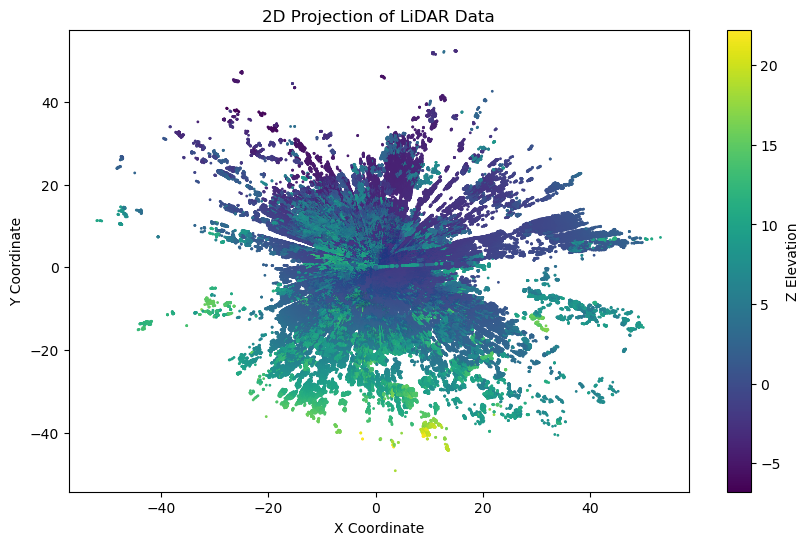

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(df["X"], df["Y"], c=df["Z"], cmap="viridis", s=1)
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("2D Projection of LiDAR Data")
plt.colorbar(label="Z Elevation")
plt.show()

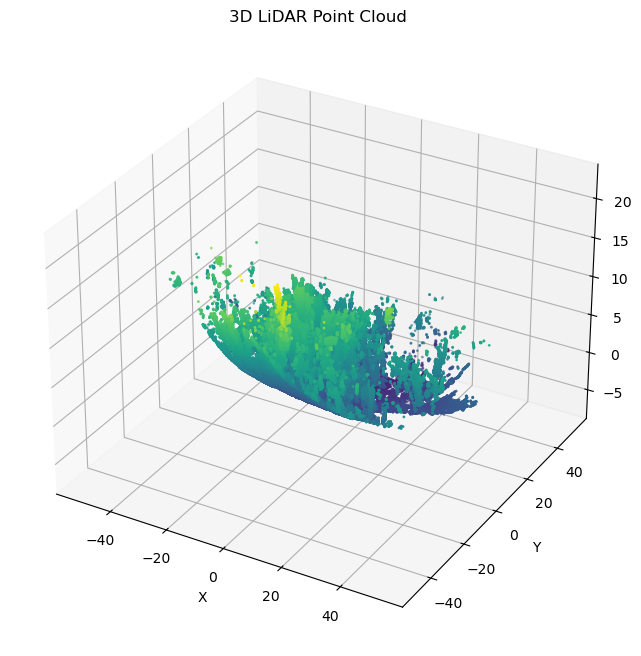

In [11]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(df["X"], df["Y"], df["Z"], c=df["Z"], cmap="viridis", s=1)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("3D LiDAR Point Cloud")
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


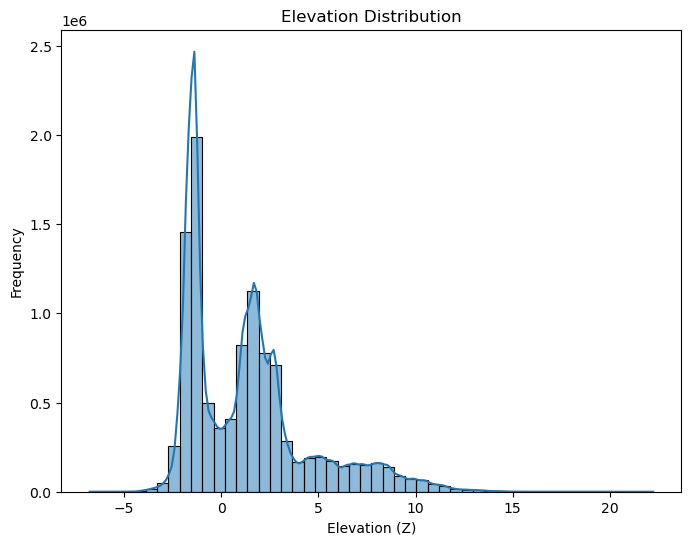

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(df["Z"], bins=50, kde=True)
plt.xlabel("Elevation (Z)")
plt.ylabel("Frequency")
plt.title("Elevation Distribution")
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


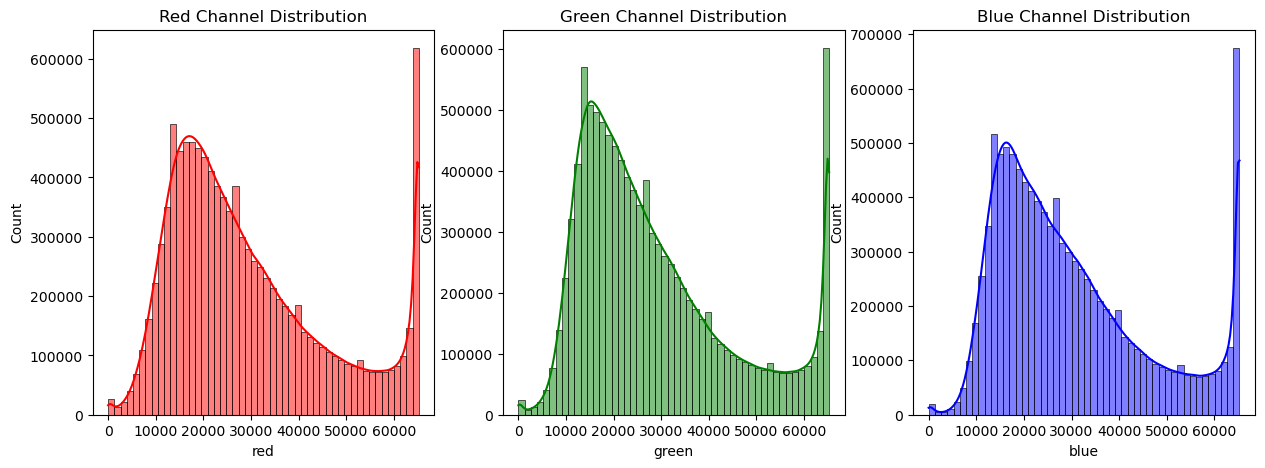

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(df["red"], bins=50, kde=True, ax=axs[0], color="red")
sns.histplot(df["green"], bins=50, kde=True, ax=axs[1], color="green")
sns.histplot(df["blue"], bins=50, kde=True, ax=axs[2], color="blue")
axs[0].set_title("Red Channel Distribution")
axs[1].set_title("Green Channel Distribution")
axs[2].set_title("Blue Channel Distribution")
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


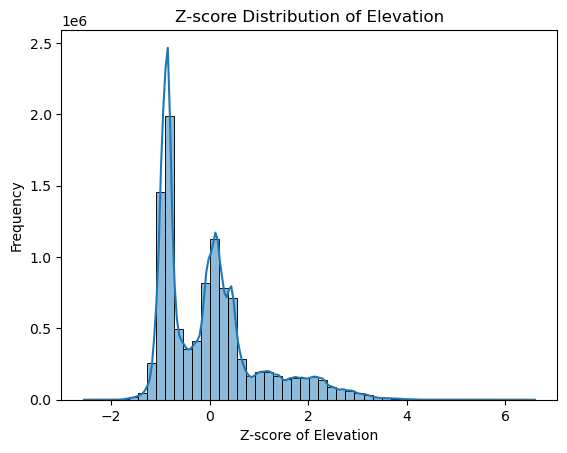

In [15]:
df["Z_zscore"] = (df["Z"] - np.mean(df["Z"])) / np.std(df["Z"])
sns.histplot(df["Z_zscore"], bins=50, kde=True)
plt.xlabel("Z-score of Elevation")
plt.ylabel("Frequency")
plt.title("Z-score Distribution of Elevation")
plt.show()

Number of outliers: 102739


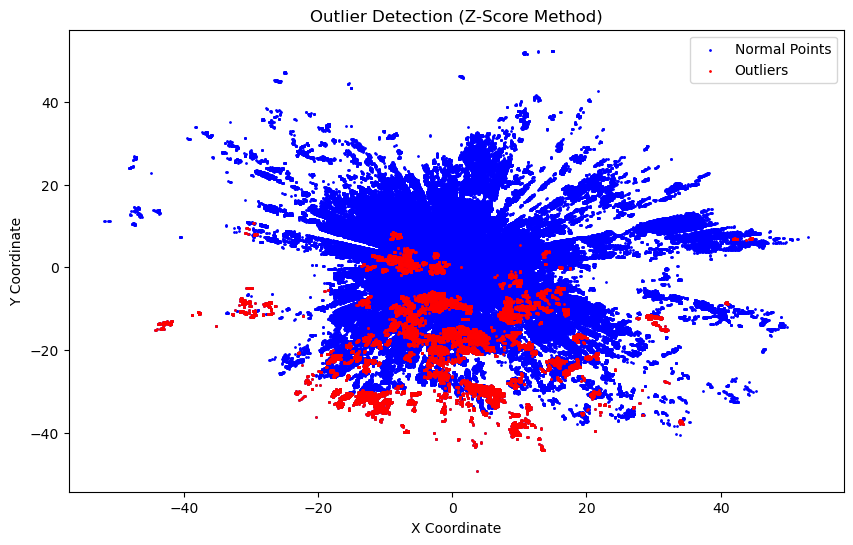

In [16]:
df["Z_zscore"] = zscore(df["Z"])
outliers = df[df["Z_zscore"].abs() > 3]  # Filter outliers
print(f"Number of outliers: {len(outliers)}")

plt.figure(figsize=(10, 6))
plt.scatter(df["X"], df["Y"], c="blue", s=1, label="Normal Points")
plt.scatter(outliers["X"], outliers["Y"], c="red", s=1, label="Outliers")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Outlier Detection (Z-Score Method)")
plt.legend()
plt.show()